In [3]:
import cga_utils
import prompt_versions
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from langchain.globals import set_llm_cache
from langchain_community.cache import SQLiteCache

set_llm_cache(SQLiteCache(database_path=".langchain.v18_trainset.db"))

In [12]:
from langchain_community.chat_models import ChatOllama
#llm = ChatOllama(model="qwen3:4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  # vagy bármely más elérhető Ollama model
llm = ChatOllama(model="hf.co/unsloth/Qwen3-4B-Instruct-2507-GGUF:latest", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  # vagy bármely más elérhető Ollama modell

In [14]:
import pandas as pd
messages = prompt_versions.prompt_versions['V18']
#messages = [(a, t.replace('/no_think','')) for (a,t)  in messages]
#messages[-1] = ( messages[-1][0],  messages[-1][1] + "/no_think" ) 

dataset_tr = pd.read_json('dataset_raw/tatqa_dataset_train.json') 


In [20]:
#problematic_qids = list(pd.read_csv('res/e37.csv').query('error_code == "selection_error" and calc_pattern == "(#+#)/#"')['qid'])
#df = pd.read_csv('res/e38_19.csv')
#problematic_qids = list(df[df["question"].str.contains("percentage change")]['qid'])

#res = cga_utils.execute_datset_predictions(llm, messages, problematic_qids)
res = cga_utils.execute_dataset_predictions(llm, messages, dataset=dataset_tr)

1770294161.9875648


0it [00:00, ?it/s]

dbee8930-0110-41c7-95fe-0178ddf4f841
What is the 2019 average rate of inflation? failure: 2.9 good answer:  2.9 
<< (2.9+2.9)/2 || [] || [2.9, 2.9] || False >>
*** Overall EM:  0.0 / 0
1665b441-93e5-481d-b0b4-2d28ce70e1a8
What is the 2019 average rate of increase in salaries? failure: 2.7 good answer:  2.7 
<< (2.7+2.7)/2 || [2.7] || [2.7, 2.7] || True >>
*** Overall EM:  0.0 / 0
2cec8a99-3a83-409b-886b-dbb65a05fb25
What is the difference between 2019 average rate of inflation and 2019 average rate of increase in salaries? failure: 0.2 good answer:  0.2 
<< [(2.9+2.9)/2] - [(2.7+2.7)/2] || [2.9, 2.7, 0.19999999999999973] || [2.9, 2.9, 2.7, 2.7] || True >>
*** Overall EM:  0.0 / 0
aa051557-3b4c-497f-b14e-2c8b8b2c99ef
What was the percentage change in cost of software under development between 2018 and 2019?[Error]unsupported operand type(s) for -: 'tuple' and 'tuple'
[Error]unsupported operand type(s) for -: 'tuple' and 'tuple'
 failure: [Error]unsupported operand type(s) for -: 'tuple'

In [19]:
annotated_results = cga_utils.annotate_results(res)
#annotated_results.to_csv('res/Ollama_2_gemma3n_e4b_code_values_v11_m1.csv')
cga_utils.calc_overall_em(annotated_results)

Annotaion warning:  invalid syntax (<unknown>, line 9)
Annotaion warning:  invalid syntax (<unknown>, line 3)


0.6753246753246753

In [8]:
annotated_results.to_csv('res/e38_38.csv')

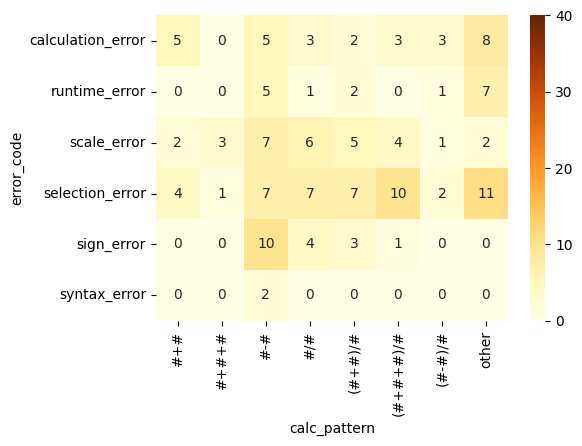

144

In [9]:
df = annotated_results.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', 40,0,3) 
len(df)

In [ ]:
set_llm_cache(SQLiteCache(database_path=".langchain.ollama38_x1.db"))
llm = ChatOllama(model="qwen3:4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  # vagy bármely más elérhető Ollama modell
res = cga_utils.execute_dataset_predictions(llm, messages)
annotated_results.to_csv('res/e38_22_x1.csv')
cga_utils.calc_overall_value_match(annotated_results), cga_utils.calc_overall_em(annotated_results), cga_utils.calc_overall_em_alt(annotated_results)

1755247533.5373132


0it [00:00, ?it/s]

b2786c1a-37de-4120-b03c-32bf5c81f157
What was the change in the amount for Appliances in 2019 from 2018? Success: -94.0
<< 680-774 || [680.0, 774.0, -94.0] || [680.0, 774.0] || True >>
fe11f001-3bfe-4089-8108-412676f0a780
What was the percentage change in the amount for Appliances in 2019 from 2018? Success: -12.14
<< (680-774)/774 || [680.0, 774.0, -12.144702842377262] || [680.0, 774.0, 774.0] || True >>
5103aed0-b4e8-4fae-bf78-e2c9f4ba84cf
What is the difference between the domestic and international discount rates as at September 30, 2019? Success: 2.1
<< 4.00 - 1.90  || [4.0, 1.9] || [4.0, 1.9] || True >>
4dc8be43-d8d9-4b08-9ffd-9c19012361ce
What is the year on year percentage change in domestic discount rate between 2018 and 2019? Success: 6.67
<< (4.00 - 3.75)/3.75  || [3.75, 4.0, 6.666666666666667] || [4.0, 3.75, 3.75] || True >>
6c44a1a8-0785-43a0-90ab-7e21df2c57d9
What is the year on year percentage change in international expected return on plan assets between 2018 and 2019? 